Добавляем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

Загружаем данные

In [2]:
#load data
data = pd.read_csv("..\..\Data\Day\S&P 500 Historical Data00-20.csv")

Проверяем валидность

In [3]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,11/14/2019,"3,096.63","3,090.75","3,098.20","3,083.26",NaN,0.08%
1,11/13/2019,"3,094.04","3,084.18","3,098.06","3,078.80",NaN,0.07%
2,11/12/2019,"3,091.84","3,089.28","3,102.61","3,084.73",NaN,0.16%
3,11/11/2019,"3,087.01","3,080.33","3,088.33","3,075.82",NaN,-0.20%
4,11/08/2019,"3,093.08","3,081.25","3,093.09","3,073.58",NaN,0.26%
...,...,...,...,...,...,...,...
4995,01/07/2000,"1,441.50","1,403.50","1,441.50","1,400.50",NaN,2.71%
4996,01/06/2000,"1,403.50","1,402.10","1,411.90","1,392.00",NaN,0.10%
4997,01/05/2000,"1,402.10","1,399.40","1,413.30","1,377.70",NaN,0.19%
4998,01/04/2000,"1,399.40","1,455.20","1,455.20","1,397.40",NaN,-3.83%


In [4]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/14/2019,"3,096.63","3,090.75","3,098.20","3,083.26",NaN,0.08%
1,11/13/2019,"3,094.04","3,084.18","3,098.06","3,078.80",NaN,0.07%
2,11/12/2019,"3,091.84","3,089.28","3,102.61","3,084.73",NaN,0.16%
3,11/11/2019,"3,087.01","3,080.33","3,088.33","3,075.82",NaN,-0.20%
4,11/08/2019,"3,093.08","3,081.25","3,093.09","3,073.58",NaN,0.26%


Подготовка данных в таблице.

In [5]:
data['Timestamp'] = pd.DataFrame(data.Date)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.Price = data.Price.str.replace(',', '').astype(float) # Here price is equal to close
data.High = data.High.str.replace(',', '').astype(float)
data.Low = data.Low.str.replace(',', '').astype(float)
data.Open = data.Open.str.replace(',', '').astype(float)
data = data.drop("Vol.", axis = 1)

Проверка корректности подготовки данных

In [6]:
data.head(20)

,Date,Price,Open,High,Low,Change %,Timestamp
4999,2000-01-03,1455.2,1469.2,1478.0,1438.4,-0.95%,01/03/2000
4998,2000-01-04,1399.4,1455.2,1455.2,1397.4,-3.83%,01/04/2000
4997,2000-01-05,1402.1,1399.4,1413.3,1377.7,0.19%,01/05/2000
4996,2000-01-06,1403.5,1402.1,1411.9,1392.0,0.10%,01/06/2000
4995,2000-01-07,1441.5,1403.5,1441.5,1400.5,2.71%,01/07/2000
4994,2000-01-10,1457.6,1441.5,1464.4,1441.5,1.12%,01/10/2000
4993,2000-01-11,1438.6,1457.6,1458.8,1434.4,-1.30%,01/11/2000
4992,2000-01-12,1432.2,1439.1,1445.3,1427.3,-0.44%,01/12/2000
4991,2000-01-13,1449.7,1432.2,1454.6,1432.2,1.22%,01/13/2000
4990,2000-01-14,1465.2,1449.7,1473.0,1449.7,1.07%,01/14/2000


In [7]:
print(data)

           Date    Price     Open     High      Low Change %   Timestamp
4999 2000-01-03  1455.20  1469.20  1478.00  1438.40   -0.95%  01/03/2000
4998 2000-01-04  1399.40  1455.20  1455.20  1397.40   -3.83%  01/04/2000
4997 2000-01-05  1402.10  1399.40  1413.30  1377.70    0.19%  01/05/2000
4996 2000-01-06  1403.50  1402.10  1411.90  1392.00    0.10%  01/06/2000
4995 2000-01-07  1441.50  1403.50  1441.50  1400.50    2.71%  01/07/2000
...         ...      ...      ...      ...      ...      ...         ...
4    2019-11-08  3093.08  3081.25  3093.09  3073.58    0.26%  11/08/2019
3    2019-11-11  3087.01  3080.33  3088.33  3075.82   -0.20%  11/11/2019
2    2019-11-12  3091.84  3089.28  3102.61  3084.73    0.16%  11/12/2019
1    2019-11-13  3094.04  3084.18  3098.06  3078.80    0.07%  11/13/2019
0    2019-11-14  3096.63  3090.75  3098.20  3083.26    0.08%  11/14/2019

[5000 rows x 7 columns]


In [8]:
special_data = pd.DataFrame(data)

Добавление альтернативной индексации

In [9]:
special_data = data[(data['Date'] > '2010-01-01') & (data['Date'] < '2015-01-01')]
special_data.index = data.index[:len(special_data)]

In [10]:
#change indexes
special_data.set_index('Date', inplace=True)

In [11]:
len(data)

5000

In [12]:
data.head(20)

,Date,Price,Open,High,Low,Change %,Timestamp
4999,2000-01-03,1455.2,1469.2,1478.0,1438.4,-0.95%,01/03/2000
4998,2000-01-04,1399.4,1455.2,1455.2,1397.4,-3.83%,01/04/2000
4997,2000-01-05,1402.1,1399.4,1413.3,1377.7,0.19%,01/05/2000
4996,2000-01-06,1403.5,1402.1,1411.9,1392.0,0.10%,01/06/2000
4995,2000-01-07,1441.5,1403.5,1441.5,1400.5,2.71%,01/07/2000
4994,2000-01-10,1457.6,1441.5,1464.4,1441.5,1.12%,01/10/2000
4993,2000-01-11,1438.6,1457.6,1458.8,1434.4,-1.30%,01/11/2000
4992,2000-01-12,1432.2,1439.1,1445.3,1427.3,-0.44%,01/12/2000
4991,2000-01-13,1449.7,1432.2,1454.6,1432.2,1.22%,01/13/2000
4990,2000-01-14,1465.2,1449.7,1473.0,1449.7,1.07%,01/14/2000


In [13]:
special_data.head(10)

,Price,Open,High,Low,Change %,Timestamp
Date,,,,,,
2010-01-04,1132.99,1116.56,1133.87,1116.56,1.60%,01/04/2010
2010-01-05,1136.52,1132.66,1136.63,1129.66,0.31%,01/05/2010
2010-01-06,1137.14,1135.71,1139.19,1133.95,0.05%,01/06/2010
2010-01-07,1141.69,1136.27,1142.46,1131.32,0.40%,01/07/2010
2010-01-08,1144.98,1140.52,1145.39,1136.22,0.29%,01/08/2010
2010-01-11,1146.98,1145.96,1149.74,1142.02,0.17%,01/11/2010
2010-01-12,1136.22,1143.81,1143.81,1131.77,-0.94%,01/12/2010
2010-01-13,1145.68,1137.31,1148.40,1133.18,0.83%,01/13/2010
2010-01-14,1148.46,1145.68,1150.41,1143.80,0.24%,01/14/2010


In [14]:
special_data['new_index'] = special_data.Price
special_data['new_date'] = special_data.Price
special_data.head()

,Price,Open,High,Low,Change %,Timestamp,new_index,new_date
Date,,,,,,,,
2010-01-04,1132.99,1116.56,1133.87,1116.56,1.60%,01/04/2010,1132.99,1132.99
2010-01-05,1136.52,1132.66,1136.63,1129.66,0.31%,01/05/2010,1136.52,1136.52
2010-01-06,1137.14,1135.71,1139.19,1133.95,0.05%,01/06/2010,1137.14,1137.14
2010-01-07,1141.69,1136.27,1142.46,1131.32,0.40%,01/07/2010,1141.69,1141.69
2010-01-08,1144.98,1140.52,1145.39,1136.22,0.29%,01/08/2010,1144.98,1144.98


In [15]:
import datetime

special_data.new_index[0] = 1262563200
special_data.new_date[0] = datetime.datetime.fromtimestamp(special_data.new_index[0]).strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.new_index[i] = special_data.new_index[i - 1] + 86400
        special_data.new_date[i] = datetime.datetime.fromtimestamp(special_data.new_index[i]).strftime('%Y-%m-%d %H:%M:%S')

In [16]:
#change indexes
date_array = special_data['new_date']
special_data.set_index('new_date', inplace=True)

In [17]:
special_data

,Price,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2010-01-04 07:00:00,1132.99,1116.56,1133.87,1116.56,1.60%,01/04/2010,1.262563e+09
2010-01-05 07:00:00,1136.52,1132.66,1136.63,1129.66,0.31%,01/05/2010,1.262650e+09
2010-01-06 07:00:00,1137.14,1135.71,1139.19,1133.95,0.05%,01/06/2010,1.262736e+09
2010-01-07 07:00:00,1141.69,1136.27,1142.46,1131.32,0.40%,01/07/2010,1.262822e+09
2010-01-08 07:00:00,1144.98,1140.52,1145.39,1136.22,0.29%,01/08/2010,1.262909e+09
...,...,...,...,...,...,...,...
2013-06-10 07:00:00,2081.88,2083.25,2087.56,2081.86,-0.01%,12/24/2014,1.370822e+09
2013-06-11 07:00:00,2088.77,2084.30,2092.70,2084.30,0.33%,12/26/2014,1.370909e+09
2013-06-12 07:00:00,2090.57,2087.63,2093.55,2085.75,0.09%,12/29/2014,1.370995e+09


Переходим к работе с данными

In [18]:
import statsmodels.api as sm
price_array = special_data["Price"]

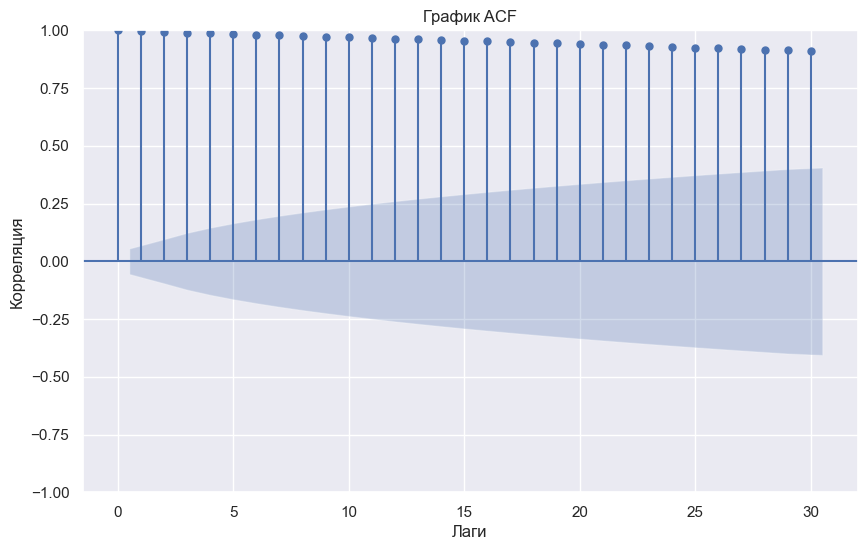

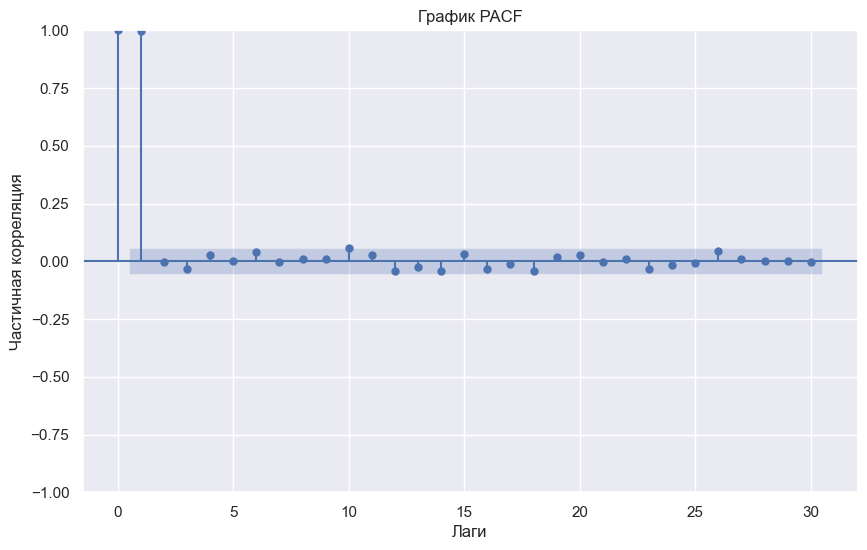

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# Построение графика автокорреляционной функции (ACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(price_array, lags=30, ax=ax)  # Установите значение lags в соответствии с вашими потребностями
plt.xlabel('Лаги')
plt.ylabel('Корреляция')
plt.title('График ACF')
plt.show()
# Построение графика частичной автокорреляционной функции (PACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(price_array, lags=30, ax=ax)  # Установите значение lags в соответствии с вашими потребностями
plt.xlabel('Лаги')
plt.ylabel('Частичная корреляция')
plt.title('График PACF')
plt.show()

Необходимо проверить стационарность нашего ряда и если он не стационарен постараться исправить это

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(price_array)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.2766677391616034
p-value: 0.9762483249209334


P-value имеет большое значени

In [21]:
data_diff = price_array.diff().dropna()

In [22]:
data_diff

new_date
2010-01-05 07:00:00     3.53
2010-01-06 07:00:00     0.62
2010-01-07 07:00:00     4.55
2010-01-08 07:00:00     3.29
2010-01-09 07:00:00     2.00
                       ...  
2013-06-10 07:00:00    -0.29
2013-06-11 07:00:00     6.89
2013-06-12 07:00:00     1.80
2013-06-13 07:00:00   -10.22
2013-06-14 07:00:00   -21.45
Name: Price, Length: 1257, dtype: float64

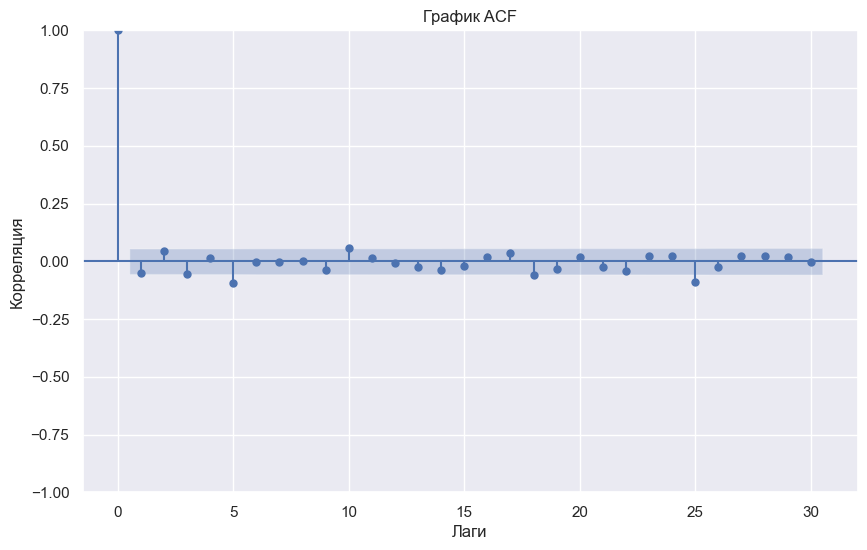

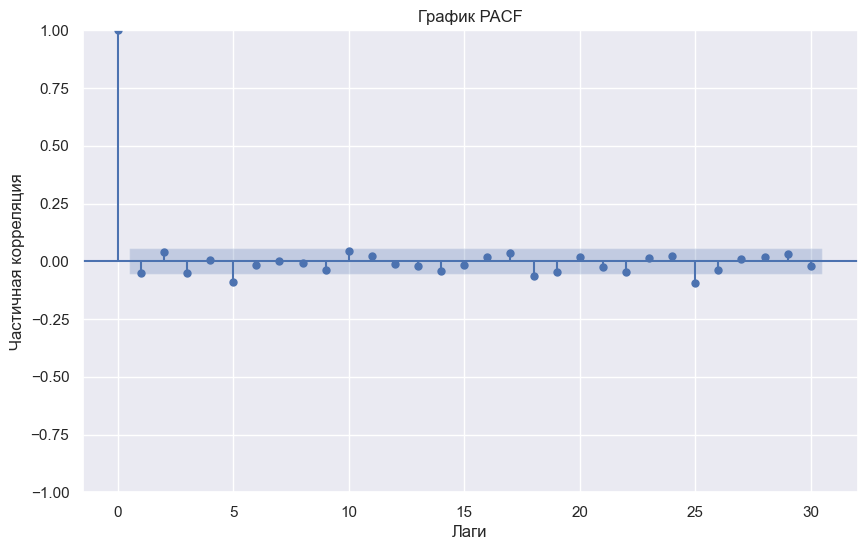

In [23]:
# Построение графика автокорреляционной функции (ACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(data_diff, lags=30, ax=ax)  # Установите значение lags в соответствии с вашими потребностями
plt.xlabel('Лаги')
plt.ylabel('Корреляция')
plt.title('График ACF')
plt.show()
# Построение графика частичной автокорреляционной функции (PACF)
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(data_diff, lags=30, ax=ax)  # Установите значение lags в соответствии с вашими потребностями
plt.xlabel('Лаги')
plt.ylabel('Частичная корреляция')
plt.title('График PACF')
plt.show()

In [24]:
result = adfuller(data_diff)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -17.59805073502081
p-value: 3.933908224326209e-30


Ура! Получили стационарный ряд!

Теперь построим наш дата фрейм.
Разделим данные на 3 категории: тренировочные, тестовые, валидационные. Конечно, такое разделение валидно для нейронных сетей, но исправим эту проблему позже

In [25]:
train_size = int(len(data_diff) * 0.7)
test_size = len(data_diff) - train_size

In [26]:
len(data_diff)

1257

In [27]:
data_diff

new_date
2010-01-05 07:00:00     3.53
2010-01-06 07:00:00     0.62
2010-01-07 07:00:00     4.55
2010-01-08 07:00:00     3.29
2010-01-09 07:00:00     2.00
                       ...  
2013-06-10 07:00:00    -0.29
2013-06-11 07:00:00     6.89
2013-06-12 07:00:00     1.80
2013-06-13 07:00:00   -10.22
2013-06-14 07:00:00   -21.45
Name: Price, Length: 1257, dtype: float64

In [28]:
model_data = pd.DataFrame({'Price': data_diff.to_numpy()[0:train_size], 'Date': date_array[1:train_size + 1]})
model_data = model_data.set_index('Date', inplace=False)
model_data.head(10)

,Price
Date,
2010-01-05 07:00:00,3.53
2010-01-06 07:00:00,0.62
2010-01-07 07:00:00,4.55
2010-01-08 07:00:00,3.29
2010-01-09 07:00:00,2.00
2010-01-10 07:00:00,-10.76
2010-01-11 07:00:00,9.46
2010-01-12 07:00:00,2.78
2010-01-13 07:00:00,-12.43


In [29]:
model_data

,Price
Date,
2010-01-05 07:00:00,3.53
2010-01-06 07:00:00,0.62
2010-01-07 07:00:00,4.55
2010-01-08 07:00:00,3.29
2010-01-09 07:00:00,2.00
...,...
2012-05-28 07:00:00,15.23
2012-05-29 07:00:00,9.94
2012-05-30 07:00:00,-6.92


Создаём модель

In [30]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(model_data["Price"], lags = 4)

In [31]:
model_fit = model.fit()

Получаем прогноз

In [32]:
forecast = model_fit.forecast(steps = test_size) 

Объединяем первое значение(вычет), данные и прогноз

In [33]:
real_and_forecast_diff =  np.concatenate([pd.Series(price_array[0]), model_data["Price"], forecast])

Возвращаем наши реальные значения

In [34]:
real_and_forecast = real_and_forecast_diff.cumsum()

Смотрим результат

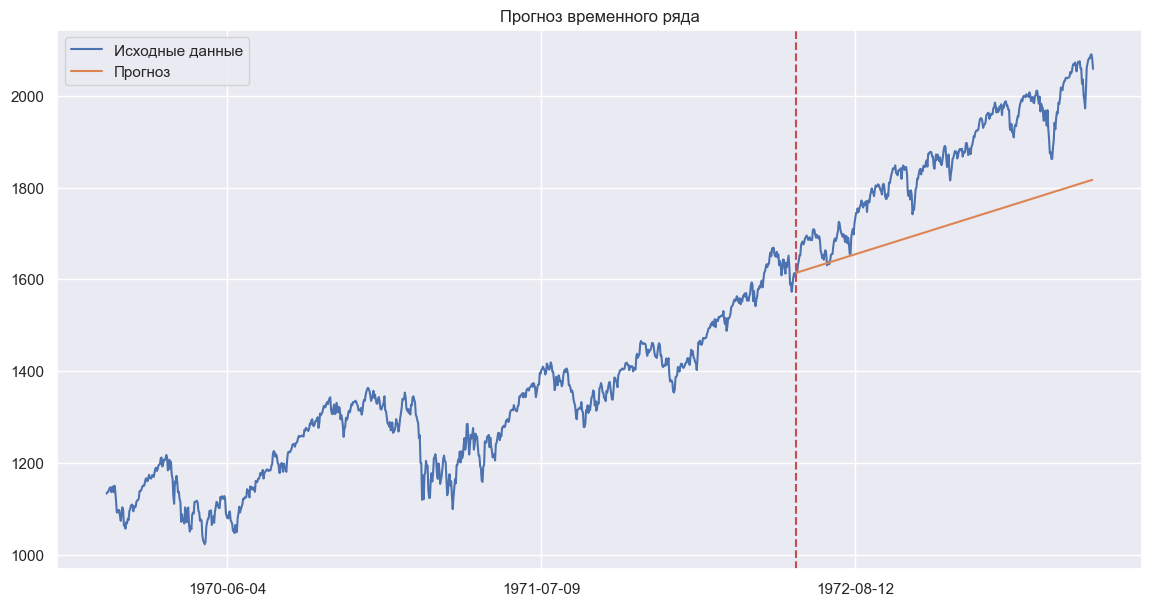

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Отобразить исходные данные
plt.plot(date_array, price_array, label='Исходные данные')

# Отобразить прогнозные значения
plt.plot(date_array[train_size:train_size+test_size], real_and_forecast[train_size:train_size+test_size], label='Прогноз')

# Настроить деления оси x
ax = plt.gca()  # Получить текущую ось
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Автоматическое распределение делений по оси x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Форматирование даты по оси x

# Установить интервал между делениями
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 400))  # Например, каждая неделя

# Добавить легенду и заголовок
plt.legend()
plt.title('Прогноз временного ряда')
plt.axvline(x=date_array[train_size], c='r', linestyle='--')

# Показать график
plt.show()

In [38]:
np.savetxt('ARDayForecast.csv', real_and_forecast, delimiter=',', fmt = '%d')